In [0]:
!python3 -m io
import pandas as pd
import numpy as np
import csv
from google.colab import files
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,log_loss,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import io

**Uploading CSV Files**

The next cell asks the executor to upload csv files on the notebook which are later used in the code. (I will email you those csv files with descriptions)

In [0]:
uploaded = files.upload()

Saving SubmissionFile.csv to SubmissionFile.csv
Saving test_values.csv to test_values (3).csv
Saving train_values_copy.csv to train_values_copy (2).csv
Saving train_values.csv to train_values (3).csv


**Preparing the Training and Test sets**

One Hot Encoding of the training and test sets. Please note that as this is a competition, the test set doesn't contain the correct answers. The "test_values.csv" contains the data that needs to be predicted (as probabilities) and submitted. As a result, "train_values.csv" is divided (75:25) for training and testing different models. 

In [0]:
train_values_df = pd.read_csv(io.BytesIO(uploaded['train_values.csv']))
test_values_df = pd.read_csv(io.BytesIO(uploaded['test_values.csv']))

data_X = train_values_df.iloc [:,1:-1].to_numpy()
data_Y = train_values_df.iloc [:,-1].to_numpy()

#One Hot Encoding For Categorical Features
my_encoder_X = OneHotEncoder(categorical_features = [0,1,3,4,5,6,9,12])
data_X_transformed = my_encoder_X.fit_transform(data_X).toarray()

my_encoder_Y = OneHotEncoder()
data_Y_transformed = my_encoder_Y.fit_transform(data_Y.reshape(-1,1)).toarray()

X_train = data_X_transformed[51:]
Y_train = data_Y[51:]


X_test = data_X_transformed[:51]
Y_test = data_Y[:51]


submission_data_X = test_values_df.iloc [:,1:].to_numpy()
submission_data_X_transformed = my_encoder_X.fit_transform(submission_data_X).toarray()


print(submission_data_X_transformed.shape)





(90, 28)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data w

**Decision Tree Model**

No questions with this model so far. I have arbitrarily (after trying various low, high, and intermediate values) adjusted the max_depth to 4. I wasn't sure if there is any way to tune it in a better way. One way I thought of was to run a loop for different depth values and get the best way or do roc_auc analysis to predict underfitting or overfitting. 

In [0]:
#Decision Tree 
decision_tree = DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=4)

decision_tree.fit(X_train,Y_train)
predictions = decision_tree.predict(X_test)
score = accuracy_score(predictions,Y_test)
#logloss = log_loss(Y_test,predictions) 

print("****HEART DISEASE PREDICTION RESULTS****\n")
classification_rep = classification_report(Y_test,predictions)
print("--->Overall Classification Report\n\n")
print(classification_rep)
print("==========")

#print("Log Loss=",str(logloss))
print("Accuracy=",str(score*100))

confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()
print("Confusion Matrix (TN,FP,FN,TP)=",tn,fp,fn,tp)

precision = tp/(tp+fp) * 100
print("Precision =",precision)

recall = tp/(tp+fn) * 100
print("Recall =",recall)

specificity = tn/(tn+fp) * 100
print("Specificity =",specificity)

f1_score = 2*precision*recall/(precision+recall)
print("F1 Score =",f1_score)

****HEART DISEASE PREDICTION RESULTS****

--->Overall Classification Report


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.67      0.78      0.72        18

    accuracy                           0.78        51
   macro avg       0.77      0.78      0.77        51
weighted avg       0.80      0.78      0.79        51

Accuracy= 78.43137254901961
Confusion Matrix (TN,FP,FN,TP)= 26 7 4 14
Precision = 66.66666666666666
Recall = 77.77777777777779
Specificity = 78.78787878787878
F1 Score = 71.7948717948718


**Logistic Regression**

No questions for this section. Just gave a try to Logistic Regression to prove that it shouldn't be done in case of dependent feature variables. 

In [0]:
#Logistic Regression
logistic_regression = LogisticRegression(solver='lbfgs', penalty="none", fit_intercept=False)

logistic_regression.fit(X_train,Y_train)
predictions = logistic_regression.predict(X_test)
prob_pred = logistic_regression.predict_proba(X_test)
score = accuracy_score(predictions,Y_test)
print(prob_pred)
#logloss = log_loss(Y_test,predictions) 

print("****HEART DISEASE PREDICTION RESULTS****\n")
classification_rep = classification_report(Y_test,predictions)
print("--->Overall Classification Report\n\n")
print(classification_rep)
print("==========")

#print("Log Loss=",str(logloss))
print("Accuracy=",str(score*100))

confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()
print("Confusion Matrix (TN,FP,FN,TP)=",tn,fp,fn,tp)

precision = tp/(tp+fp) * 100
print("Precision =",precision)

recall = tp/(tp+fn) * 100
print("Recall =",recall)

specificity = tn/(tn+fp) * 100
print("Specificity =",specificity)

f1_score = 2*precision*recall/(precision+recall)
print("F1 Score =",f1_score)

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:",str(roc_auc))

[[0.95260687 0.04739313]
 [0.97073896 0.02926104]
 [0.21773722 0.78226278]
 [0.4801007  0.5198993 ]
 [0.12872215 0.87127785]
 [0.98131533 0.01868467]
 [0.00974846 0.99025154]
 [0.03760819 0.96239181]
 [0.00892598 0.99107402]
 [0.96268662 0.03731338]
 [0.57384989 0.42615011]
 [0.83362486 0.16637514]
 [0.98937895 0.01062105]
 [0.5418134  0.4581866 ]
 [0.19675379 0.80324621]
 [0.04696894 0.95303106]
 [0.94126041 0.05873959]
 [0.0571218  0.9428782 ]
 [0.93382861 0.06617139]
 [0.85444576 0.14555424]
 [0.95364708 0.04635292]
 [0.07979958 0.92020042]
 [0.78919533 0.21080467]
 [0.25102019 0.74897981]
 [0.96992353 0.03007647]
 [0.94270175 0.05729825]
 [0.61953904 0.38046096]
 [0.98123824 0.01876176]
 [0.53961402 0.46038598]
 [0.97970929 0.02029071]
 [0.61769689 0.38230311]
 [0.02384675 0.97615325]
 [0.0102998  0.9897002 ]
 [0.9107258  0.0892742 ]
 [0.07889801 0.92110199]
 [0.74905531 0.25094469]
 [0.63835906 0.36164094]
 [0.97145259 0.02854741]
 [0.92580532 0.07419468]
 [0.13879495 0.86120505]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


**Random Forest Classifier**

Lastly, I tried the Random Forest classifier. It seems to work really well but I am still not sure about how to get the right values of n_estimators (trees) and max_depth. I tried to run a loop and tune it, but doesn't work because it doesn't give the same answer every time. 

In the further code boxes, I have tried to do roc_auc analysis for finding a good depth and n_estimators but doesn't seem helpful as well. 

**QUESTION** -- Can you please check the next two code boxes in which I tried to tune the Random Forest and suggest with some techniques to tune the Random Forest Classifier? 

In [0]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 300, max_depth = 28, min_samples_leaf = 1)
random_forest.fit(X_train,Y_train)
predictions = random_forest.predict(X_test)
prob_pred = random_forest.predict_proba(X_test)

score = accuracy_score(predictions,Y_test)

print("****HEART DISEASE PREDICTION RESULTS****\n")
classification_rep = classification_report(Y_test,predictions)
print("--->Overall Classification Report\n\n")
print(classification_rep)
print("==========")

#print("Log Loss=",str(logloss))
print("Accuracy=",str(score*100))

confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()
print("Confusion Matrix (TN,FP,FN,TP)=",tn,fp,fn,tp)

precision = tp/(tp+fp) * 100
print("Precision =",precision)

recall = tp/(tp+fn) * 100
print("Recall =",recall)

specificity = tn/(tn+fp) * 100
print("Specificity =",specificity)

f1_score = 2*precision*recall/(precision+recall)
print("F1 Score =",f1_score)


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:",str(roc_auc))
#print(prob_pred)

****HEART DISEASE PREDICTION RESULTS****

--->Overall Classification Report


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.68      0.72      0.70        18

    accuracy                           0.78        51
   macro avg       0.76      0.77      0.77        51
weighted avg       0.79      0.78      0.79        51

Accuracy= 78.43137254901961
Confusion Matrix (TN,FP,FN,TP)= 27 6 5 13
Precision = 68.42105263157895
Recall = 72.22222222222221
Specificity = 81.81818181818183
F1 Score = 70.27027027027027
AUC: 0.7702020202020202


In [0]:
#Tuning The Previous Random Forest Model (estimators)
n_estimators_val = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results= []
test_results = []

for estimators in n_estimators_val:
  random_forest = RandomForestClassifier(n_estimators = estimators)
  random_forest.fit(X_train,Y_train)
  
  train_predictions = random_forest.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_predictions)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  #print(estimators,str(roc_auc))
  
  test_predictions = random_forest.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, test_predictions)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  print(estimators,str(roc_auc))
  
#line1 = plt.plot(np.array(n_estimators_val), np.array(train_results), 'b', label='Train AUC')
#line2 = plt.plot(np.array(n_estimators_val), np.array(test_results), 'r', label='Test AUC')
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#plt.ylabel('AUC score')
#plt.xlabel('Estimator')
#plt.show()

  
  
  

      

1 0.7424242424242422
2 0.6641414141414141
4 0.7171717171717171
8 0.7727272727272727
16 0.8005050505050506
32 0.7424242424242422
64 0.7272727272727272
100 0.7272727272727272
200 0.7853535353535355


1.0 0.7323232323232324
2.0 0.8282828282828283
3.0 0.73989898989899
4.0 0.8005050505050506
5.0 0.7727272727272727
6.0 0.7878787878787877
7.0 0.6691919191919192
8.0 0.7727272727272727
9.0 0.6136363636363635
10.0 0.7424242424242422
11.0 0.7297979797979798
12.0 0.7424242424242422
13.0 0.7146464646464646
14.0 0.702020202020202
15.0 0.7727272727272727
16.0 0.7575757575757576
17.0 0.7575757575757576
18.0 0.7272727272727272
19.0 0.712121212121212
20.0 0.7474747474747475
21.0 0.744949494949495
22.0 0.7727272727272727
23.0 0.7474747474747475
24.0 0.696969696969697
25.0 0.7727272727272727
26.0 0.73989898989899
27.0 0.7575757575757576
28.0 0.7424242424242422
29.0 0.845959595959596
30.0 0.7601010101010102
31.0 0.7146464646464646
32.0 0.7727272727272727


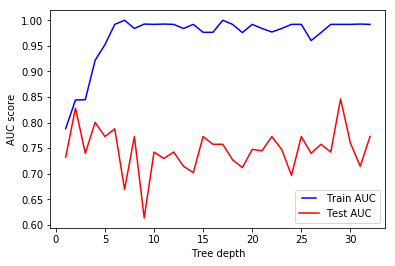

In [0]:
#Tuning The Previous Random Forest Model (depth)
depth_vals = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in depth_vals:
  rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1,n_estimators = 10)
  rf.fit(X_train, Y_train)
  
  train_pred = rf.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  
  
  y_pred = rf.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)
  print(max_depth,str(roc_auc))
  


  
line1, = plt.plot(depth_vals, train_results, 'b', label='Train AUC')
line2, = plt.plot(depth_vals, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


** SGD CLASSIFIER** 

Just gave a try to SGD classifier as it is kind of a combination of Logistic Regression and SVM. But doesn't seem to perform well because of data dependency. No questions for this as well. 

In [0]:
#SGD Classifier
sgd_classifier = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, shuffle=True)
sgd_classifier.fit(X_train, Y_train)
predictions = sgd_classifier.predict(X_test)

score = accuracy_score(Y_test,predictions)
print(score*100)

print("****HEART DISEASE PREDICTION RESULTS****\n")
classification_rep = classification_report(Y_test,predictions)
print("--->Overall Classification Report\n\n")
print(classification_rep)
print("==========")

#print("Log Loss=",str(logloss))
print("Accuracy=",str(score*100))

confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()
print("Confusion Matrix (TN,FP,FN,TP)=",tn,fp,fn,tp)

precision = tp/(tp+fp) * 100
print("Precision =",precision)

recall = tp/(tp+fn) * 100
print("Recall =",recall)

specificity = tn/(tn+fp) * 100
print("Specificity =",specificity)

f1_score = 2*precision*recall/(precision+recall)
print("F1 Score =",f1_score)


70.58823529411765
****HEART DISEASE PREDICTION RESULTS****

--->Overall Classification Report


              precision    recall  f1-score   support

           0       0.91      0.61      0.73        33
           1       0.55      0.89      0.68        18

    accuracy                           0.71        51
   macro avg       0.73      0.75      0.70        51
weighted avg       0.78      0.71      0.71        51

Accuracy= 70.58823529411765
Confusion Matrix (TN,FP,FN,TP)= 20 13 2 16
Precision = 55.172413793103445
Recall = 88.88888888888889
Specificity = 60.60606060606061
F1 Score = 68.08510638297871
